### 1、	练习分组与聚合，研究星巴克中国各区域开店分布，并绘图

In [1]:
import pandas as pd
import numpy as np

In [6]:
dict1 = {'key1': ['a', 'b', 'a', 'b',
                  'a', 'b', 'a', 'a'],
         'key2': ['one', 'one', 'two', 'three',
                  'two', 'two', 'one', 'three'],
         'data1': np.random.randint(1, 8, size=8),
         'data2': np.random.randint(1, 8, size=8)}
a = pd.DataFrame(dict1)
print(a)
print('-' * 30)
print(a.index)
print(a.columns)

  key1   key2  data1  data2
0    a    one      7      7
1    b    one      6      6
2    a    two      2      4
3    b  three      1      7
4    a    two      3      1
5    b    two      1      5
6    a    one      4      3
7    a  three      1      7
------------------------------
RangeIndex(start=0, stop=8, step=1)
Index(['key1', 'key2', 'data1', 'data2'], dtype='object')


In [19]:
b = a.groupby('key1')  # b是a根据key1分组后的对象
print(b['data1'].max())  # 分组之后进行聚合才会显示具体的数值
print('-' * 30)
print(b['data2'].min())
print('-' * 30)
print(b.mean())  # 只会计算数值的平均值，所以key2列是不会进行计算的

key1
a    7
b    6
Name: data1, dtype: int64
------------------------------
key1
a    1
b    5
Name: data2, dtype: int64
------------------------------
         data1  data2
key1                 
a     3.400000    4.4
b     2.666667    6.0


#### 自定义分组

In [24]:
self_key = [0, 0, 0, 0, 3, 4, 4, 7]
c = a.groupby(self_key)
print(c.size())
print('-' * 30)
print(c.mean())

0    4
3    1
4    2
7    1
dtype: int64
------------------------------
   data1  data2
0    4.0    6.0
3    3.0    1.0
4    2.5    4.0
7    1.0    7.0


#### 多层分组

In [43]:
d = a.groupby(['key1', 'key2'])  # 先按照key1分组，在按照key2分组
print(d.size())
print('-' * 30)
print(d.max())
print('-' * 30)
for group_name, group_value in d:
    print(group_name)  # key1,key2
    print(group_value)
    print('-' * 30)
print('*' * 40)
print(list(d))  # 通过将分组对象转换为list，来展示具体的元素

key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
------------------------------
            data1  data2
key1 key2               
a    one        7      7
     three      1      7
     two        3      4
b    one        6      6
     three      1      7
     two        1      5
------------------------------
('a', 'one')
  key1 key2  data1  data2
0    a  one      7      7
6    a  one      4      3
------------------------------
('a', 'three')
  key1   key2  data1  data2
7    a  three      1      7
------------------------------
('a', 'two')
  key1 key2  data1  data2
2    a  two      2      4
4    a  two      3      1
------------------------------
('b', 'one')
  key1 key2  data1  data2
1    b  one      6      6
------------------------------
('b', 'three')
  key1   key2  data1  data2
3    b  three      1      7
------------------------------
('b', 'two')
  key1 key2  data1  data2
5    b  two      1      5
--

### 星巴克实战

In [46]:
file = './starbucks_store_worldwide.csv'
information = pd.read_csv(file)
print(information.head(1))  # 因为数据量巨大，所以先看前几行以便掌握数据的格式
print('-' * 30)
print(information.info())  # 可以观察数据大致的信息，看到有多少列，以及数据类型

       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       Licensed  Av. Meritxell, 96   

               City State/Province Country Postcode Phone Number  \
0  Andorra la Vella              7      AD    AD500    376818720   

                  Timezone  Longitude  Latitude  
0  GMT+1:00 Europe/Andorra       1.53     42.51  
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode 

In [56]:
information_country = information.groupby('Country')  # 按照国家分组
print(information_country.size())
print(type(information_country))  # DataFrameGroupBy
country = information_country['Country'].size()
print('-' * 30)
print(country)
print(type(country))  #Series
print('-' * 30)
print(country['CN'])  # 中国店铺的数量

Country
AD        1
AE      144
AR      108
AT       18
AU       22
      ...  
TT        3
TW      394
US    13608
VN       25
ZA        3
Length: 73, dtype: int64
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
------------------------------
Country
AD        1
AE      144
AR      108
AT       18
AU       22
      ...  
TT        3
TW      394
US    13608
VN       25
ZA        3
Name: Country, Length: 73, dtype: int64
<class 'pandas.core.series.Series'>
------------------------------
2734


0        False
1        False
2        False
3        False
4        False
         ...  
25595    False
25596    False
25597    False
25598    False
25599    False
Name: Country, Length: 25600, dtype: bool
------------------------------
          Brand  Store Number           Store Name Ownership Type  \
2091  Starbucks  22901-225145            北京西站第一咖啡店  Company Owned   
2092  Starbucks  32320-116537              北京华宇时尚店  Company Owned   
2093  Starbucks  32447-132306           北京蓝色港湾圣拉娜店  Company Owned   
2094  Starbucks  17477-161286           北京太阳宫凯德嘉茂店  Company Owned   
2095  Starbucks  24520-237564              北京东三环北店  Company Owned   
...         ...           ...                  ...            ...   
4820  Starbucks  17872-186929                Sands       Licensed   
4821  Starbucks  24126-235784              Wynn II       Licensed   
4822  Starbucks  28490-242269      Wynn Palace BOH       Licensed   
4823  Starbucks  22210-218665  Sands Cotai Central       Licensed   
482

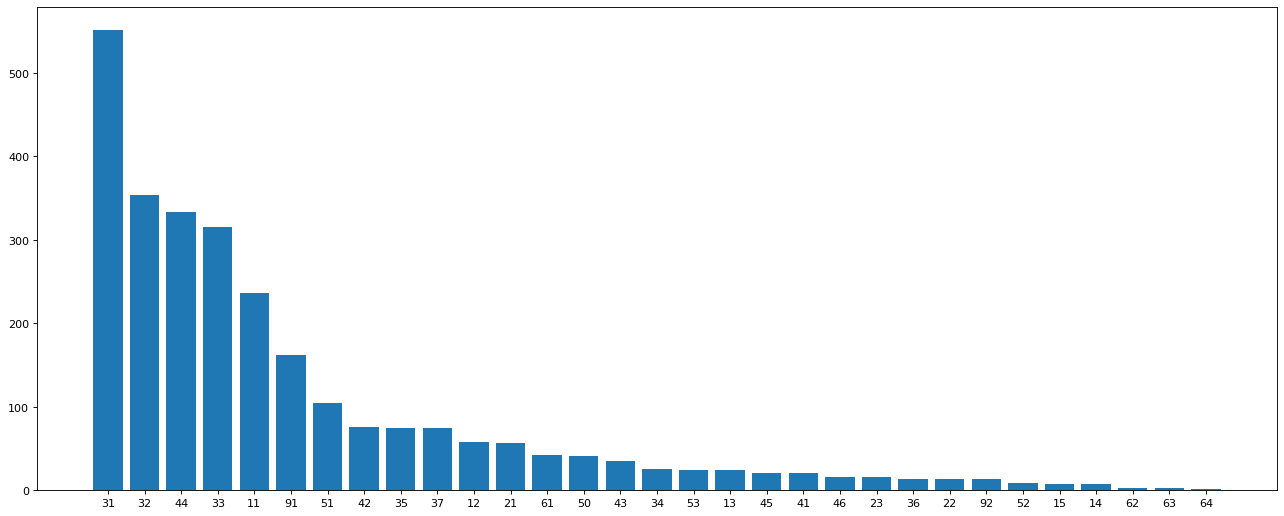

In [83]:
import matplotlib.pyplot as plt

# 在DataFrame里存放Series，因为行数相同，可以通过True和False进行过滤，输出为True的值
country_cn = information[information['Country'] == 'CN']
# print(information['Country'] == 'CN')
# print(information[False])
print('-' * 30)
print(country_cn)  # 选出中国的城市
china_province = country_cn.groupby('State/Province').size().sort_values(ascending=False)
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(china_province.index, china_province.values)
plt.show()

### 2、	熟练索引设置，时间序列接口

In [84]:
dict1 = {'key1': ['a', 'b', 'a', 'b',
                  'a', 'b', 'a', 'a'],
         'key2': ['one', 'one', 'two', 'three',
                  'two', 'two', 'one', 'three'],
         'data1': np.random.randint(1, 8, size=8),
         'data2': np.random.randint(1, 8, size=8)}
a = pd.DataFrame(dict1)
print(a)
a.index = list('abcdefgh')  # 重新设置a的index
print('-' * 30)
print(a)
b = a.reindex(list('ijklmnop'))  # 返回一个新的df，但是没有值，拥有和a相同的列索引
print('-' * 30)
print(b)

  key1   key2  data1  data2
0    a    one      6      4
1    b    one      3      5
2    a    two      7      6
3    b  three      4      7
4    a    two      3      4
5    b    two      4      5
6    a    one      6      4
7    a  three      6      7
------------------------------
  key1   key2  data1  data2
a    a    one      6      4
b    b    one      3      5
c    a    two      7      6
d    b  three      4      7
e    a    two      3      4
f    b    two      4      5
g    a    one      6      4
h    a  three      6      7
  key1 key2  data1  data2
i  NaN  NaN    NaN    NaN
j  NaN  NaN    NaN    NaN
k  NaN  NaN    NaN    NaN
l  NaN  NaN    NaN    NaN
m  NaN  NaN    NaN    NaN
n  NaN  NaN    NaN    NaN
o  NaN  NaN    NaN    NaN
p  NaN  NaN    NaN    NaN


In [91]:
print(a)
print('-' * 30)
b = a.set_index(['data1', 'data2'])  # 可以将df的某几列当作索引
print(b)
print('-' * 30)
print(b.index)

  key1   key2  data1  data2
a    a    one      6      4
b    b    one      3      5
c    a    two      7      6
d    b  three      4      7
e    a    two      3      4
f    b    two      4      5
g    a    one      6      4
h    a  three      6      7
------------------------------
            key1   key2
data1 data2            
6     4        a    one
3     5        b    one
7     6        a    two
4     7        b  three
3     4        a    two
4     5        b    two
6     4        a    one
      7        a  three
------------------------------
MultiIndex([(6, 4),
            (3, 5),
            (7, 6),
            (4, 7),
            (3, 4),
            (4, 5),
            (6, 4),
            (6, 7)],
           names=['data1', 'data2'])


#### 时间序列

In [93]:
# 默认以天为频率
pd.date_range(start='20220101', end='20221010')

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04',
               '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
               '2022-10-09', '2022-10-10'],
              dtype='datetime64[ns]', length=283, freq='D')

In [95]:
# 以Month为频率
pd.date_range(start='20220101', end='20221010', freq='M')

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30'],
              dtype='datetime64[ns]', freq='M')

In [96]:
# 以一周为频率
pd.date_range(start='20220101', end='20221010', freq='W')

DatetimeIndex(['2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23',
               '2022-01-30', '2022-02-06', '2022-02-13', '2022-02-20',
               '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
               '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17',
               '2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15',
               '2022-05-22', '2022-05-29', '2022-06-05', '2022-06-12',
               '2022-06-19', '2022-06-26', '2022-07-03', '2022-07-10',
               '2022-07-17', '2022-07-24', '2022-07-31', '2022-08-07',
               '2022-08-14', '2022-08-21', '2022-08-28', '2022-09-04',
               '2022-09-11', '2022-09-18', '2022-09-25', '2022-10-02',
               '2022-10-09'],
              dtype='datetime64[ns]', freq='W-SUN')

### 911实战

In [117]:
information = pd.read_csv('./911.csv')
print(information.info())  # 观察数据总类类型
# 把字符串时间类型转化为时间类型的
information['timeStamp'] = pd.to_datetime(information['timeStamp'])
print('-' * 30)
print(information.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249737 entries, 0 to 249736
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        249737 non-null  float64
 1   lng        249737 non-null  float64
 2   desc       249737 non-null  object 
 3   zip        219391 non-null  float64
 4   title      249737 non-null  object 
 5   timeStamp  249737 non-null  object 
 6   twp        249644 non-null  object 
 7   addr       249737 non-null  object 
 8   e          249737 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 17.1+ MB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249737 entries, 0 to 249736
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        249737 non-null  float64       
 1   lng        249737 non-null  float64       
 2   desc       249737 non-null  objec

In [118]:
print(information.head(1))  # 观察数据的格式，找出报警的类别在title[0]
temp_list = information['title'].str.split(': ').tolist()
cate_list = [i[0] for i in temp_list]  # 从分开的列表中去除[0]表示类别
information['cate'] = pd.DataFrame(np.array(cate_list).reshape(
    (information.shape[0], 1)))
print(information.info())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title           timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY 2015-12-10 17:10:52  NEW HANOVER   

                     addr  e  
0  REINDEER CT & DEAD END  1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249737 entries, 0 to 249736
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        249737 non-null  float64       
 1   lng        249737 non-null  float64       
 2   desc       249737 non-null  object        
 3   zip        219391 non-null  float64       
 4   title      249737 non-null  object        
 5   timeStamp  249737 non-null  datetime64[ns]
 6   twp        249644 non-null  object        
 7   addr       249737 non-null  object        
 8   e          249737 non-null  int64         

In [119]:
# 将timeStamp设置为索引，方便通过时间获取信息
information.set_index('timeStamp', inplace=True)
print(information.head())

                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
2015-12-10 16:56:52  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

                         zip                    title                twp  \
timeStamp                                                                  
2015-12-10 17

timeStamp
2015-12-31    3898
2016-01-31    6063
2016-02-29    5413
2016-03-31    5832
2016-04-30    5684
2016-05-31    5730
2016-06-30    5720
2016-07-31    6029
2016-08-31    6005
2016-09-30    5750
2016-10-31    6039
2016-11-30    5838
2016-12-31    6024
2017-01-31    6082
2017-02-28    5417
2017-03-31    5913
2017-04-30    5780
2017-05-31    5948
2017-06-30    6030
2017-07-31    5974
2017-08-31    5882
2017-09-30    3789
Freq: M, Name: title, dtype: int64
DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30'],
              dtype='datetime64[ns]', name='timeStamp', freq='M')
timeStamp
2015-12-31    1095
2016-01-31    1904
2016-02-29    1868
2016-

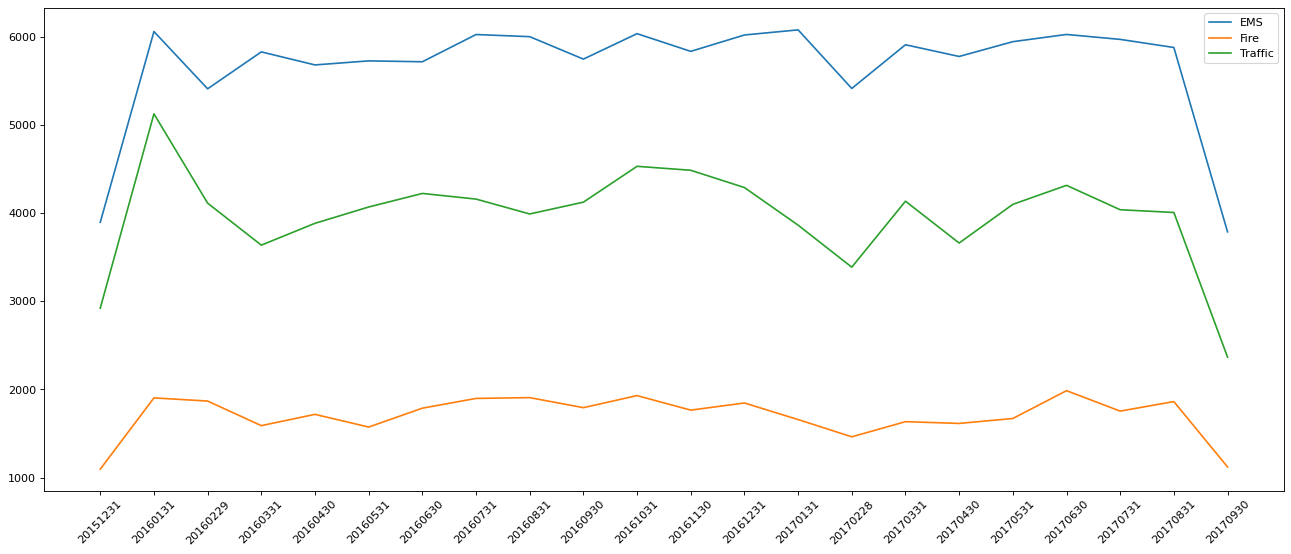

In [123]:
plt.figure(figsize=(20, 8), dpi=80)
cate_data = information.groupby('cate')  # 通过类别来分组
for group_name, group_value in cate_data:
    count_month = group_value.resample("M").count()['title']  # 以月为频率进行将采样
    print(count_month)
    x = count_month.index
    print(x)
    y = count_month.values
    x = [i.strftime("%Y%m%d") for i in x]  # 转换时间格式
    plt.plot(x, y, label=group_name)
plt.xticks(range(len(x)), x, rotation=45)
plt.legend(loc='best')
plt.show()